# 주식 종목 시총순으로 크롤링하기

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import os

#browser = webdriver.Chrome()
browser = webdriver.Chrome('./chromedriver.exe')


C:\Users\ParkGY\AppData\Local\Temp\ipykernel_21272\466897816.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('./chromedriver.exe')


페이지 이동

In [3]:
url = 'https://finance.naver.com/sise/sise_market_sum.naver?&page=1
'
browser.get(url)


조회 항목 초기화 (선택해제)
- 'filedIds' 라는 이름으로 모든 체크박스를 가져옴
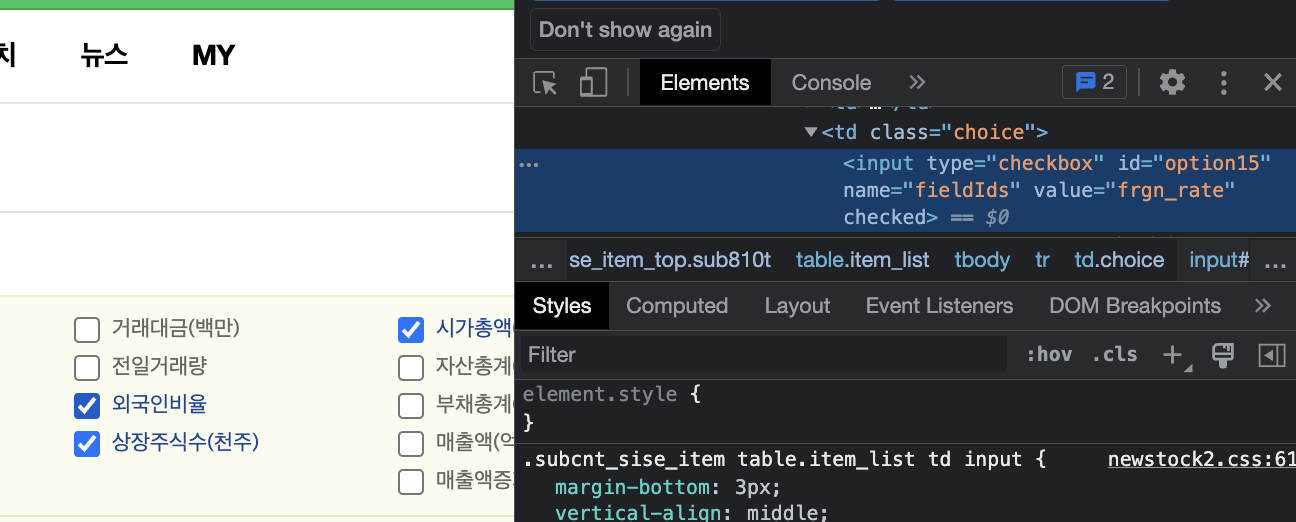

Checkbox 가져오기

In [6]:
checkboxes = browser.find_elements(By.NAME, 'fieldIds')

In [7]:
for checkbox in checkboxes:
    if checkbox.is_selected():
        checkbox.click()

### 원하는 항목 체크
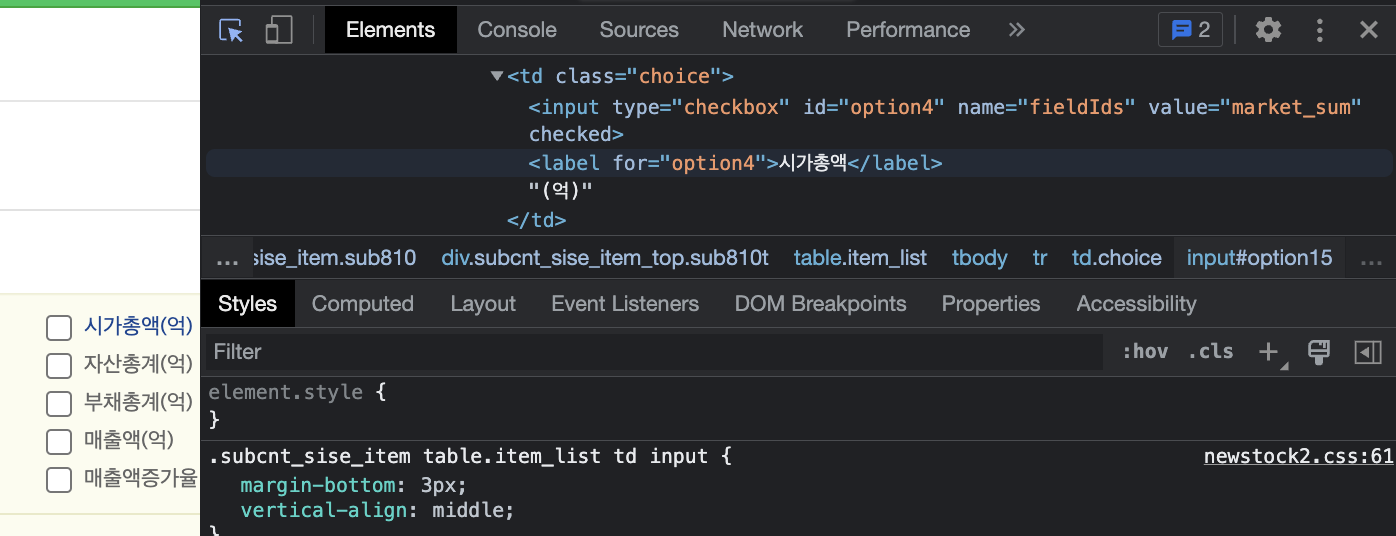

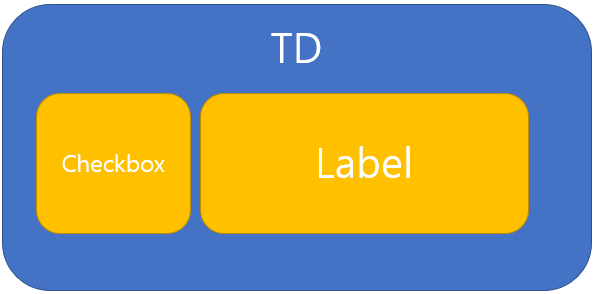

전체 레이블 모두 출력하기

In [8]:
for checkbox in checkboxes:
    parent = checkbox.find_element(By.XPATH, '..') # 부모엘레먼트찾기
    label  = parent.find_element(By.TAG_NAME, 'label')
    print(label.text)

거래량
매수호가
거래대금
시가총액
영업이익
PER
시가
매도호가
전일거래량
자산총계
영업이익증가율
ROE
고가
매수총잔량
외국인비율
부채총계
당기순이익
ROA
저가
매도총잔량
상장주식수
매출액
주당순이익
PBR
매출액증가율
보통주배당금
유보율


선택하고 싶은 항목 레이블과일치하면 체크박스를 클릭

In [17]:
items_to_select = ['매수호가', '영업이익', '외국인비율', '매출액']

In [18]:
for checkbox in checkboxes:
    parent = checkbox.find_element(By.XPATH, '..')
    label  = parent.find_element(By.TAG_NAME, 'label')
    
    if label.text in items_to_select:
        checkbox.click()

적용하기 버튼 클릭
- xPath : //*[@id="contentarea_left"]/div[2]/form/div/div/div/a[1]

In [19]:
btn_apply = browser.find_element(By.XPATH,'//a[@href="javascript:fieldSubmit()"]')
btn_apply.click()

데이터추출

In [20]:
df = pd.read_html(browser.page_source)

In [21]:
len(df) # df의 테이블이 3개가 있는것임. 

3

In [22]:
df[0] # 이건 딱히 원하는 정보가 아님 

,0,1,2,3,4,5
0,거래량,매수호가,거래대금(백만),시가총액(억),영업이익(억),PER(배)
1,시가,매도호가,전일거래량,자산총계(억),영업이익증가율,ROE(%)
2,고가,매수총잔량,외국인비율,부채총계(억),당기순이익(억),ROA(%)
3,저가,매도총잔량,상장주식수(천주),매출액(억),주당순이익(원),PBR(배)
4,NaN,NaN,NaN,매출액증가율,보통주배당금(원),유보율(%)


In [23]:
df[1]

,N,종목명,현재가,전일비,등락률,액면가,매수호가,매출액,영업이익,외국인비율,토론실,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51.0,현대글로비스,166000.0,1000.0,+0.61%,500.0,166000.0,217796.0,11262.0,46.05,NaN,NaN,NaN
2,52.0,롯데케미칼,176000.0,2500.0,+1.44%,5000.0,175000.0,181205.0,15356.0,23.36,NaN,NaN,NaN
3,53.0,SK스퀘어,42100.0,2250.0,+5.65%,100.0,42050.0,11464.0,4198.0,41.59,NaN,NaN,NaN
4,54.0,한온시스템,11050.0,300.0,+2.79%,100.0,11000.0,73514.0,3258.0,17.11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,99.0,한국금융지주,54400.0,600.0,+1.12%,5000.0,54400.0,137861.0,15210.0,33.30,NaN,NaN,NaN
77,100.0,삼성증권,32750.0,150.0,-0.46%,5000.0,32750.0,98095.0,13087.0,27.14,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


필요로 하는 데이터만 가져와서 새로 데이터프레임 구성하기

In [25]:
df = pd.read_html(browser.page_source)[1]
df

,N,종목명,현재가,전일비,등락률,액면가,매수호가,매출액,영업이익,외국인비율,토론실,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,삼성전자,55600.0,400.0,-0.71%,100.0,55600.0,2796048.0,516339.0,49.62,NaN,NaN,NaN
2,2.0,LG에너지솔루션,486500.0,1500.0,-0.31%,500.0,486500.0,178519.0,7685.0,4.30,NaN,NaN,NaN
3,3.0,SK하이닉스,90400.0,0.0,0.00%,5000.0,90300.0,429978.0,124103.0,50.34,NaN,NaN,NaN
4,4.0,삼성바이오로직스,810000.0,1000.0,-0.12%,2500.0,810000.0,15680.0,5373.0,10.58,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,49.0,하이브,158000.0,0.0,0.00%,500.0,158000.0,12559.0,1902.0,15.30,NaN,NaN,NaN
77,50.0,한국조선해양,88100.0,200.0,-0.23%,5000.0,88100.0,154934.0,-13848.0,20.98,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


불필요한 NAN Row 삭제 : tr 삭제 - row 기준

In [26]:
df.dropna(axis='index', how ='all', inplace=True)
df

,N,종목명,현재가,전일비,등락률,액면가,매수호가,매출액,영업이익,외국인비율,토론실,Unnamed: 11,Unnamed: 12
1,1.0,삼성전자,55600.0,400.0,-0.71%,100.0,55600.0,2796048.0,516339.0,49.62,NaN,NaN,NaN
2,2.0,LG에너지솔루션,486500.0,1500.0,-0.31%,500.0,486500.0,178519.0,7685.0,4.30,NaN,NaN,NaN
3,3.0,SK하이닉스,90400.0,0.0,0.00%,5000.0,90300.0,429978.0,124103.0,50.34,NaN,NaN,NaN
4,4.0,삼성바이오로직스,810000.0,1000.0,-0.12%,2500.0,810000.0,15680.0,5373.0,10.58,NaN,NaN,NaN
5,5.0,LG화학,644000.0,21000.0,+3.37%,5000.0,643000.0,426547.0,50255.0,48.02,NaN,NaN,NaN
9,6.0,삼성전자우,52000.0,0.0,0.00%,100.0,51900.0,NaN,NaN,71.88,NaN,NaN,NaN
10,7.0,현대차,200000.0,2000.0,-0.99%,5000.0,200000.0,1176106.0,66789.0,28.79,NaN,NaN,NaN
11,8.0,삼성SDI,571000.0,17000.0,+3.07%,5000.0,571000.0,135532.0,10676.0,43.96,NaN,NaN,NaN
12,9.0,NAVER,231500.0,0.0,0.00%,100.0,231000.0,68176.0,13255.0,53.24,NaN,NaN,NaN
13,10.0,기아,80900.0,1400.0,-1.70%,5000.0,80900.0,698624.0,50657.0,36.97,NaN,NaN,NaN


### 불필요한 NAN colmun 삭제 
- 13개만큼의 TD를 미리 확보해놓음 최대 6개까지 선택되니까 placeholder td 였음. 
- 필요 없으니 삭제

In [27]:
df.dropna(axis='columns', how ='all', inplace=True)
df

,N,종목명,현재가,전일비,등락률,액면가,매수호가,매출액,영업이익,외국인비율
1,1.0,삼성전자,55600.0,400.0,-0.71%,100.0,55600.0,2796048.0,516339.0,49.62
2,2.0,LG에너지솔루션,486500.0,1500.0,-0.31%,500.0,486500.0,178519.0,7685.0,4.30
3,3.0,SK하이닉스,90400.0,0.0,0.00%,5000.0,90300.0,429978.0,124103.0,50.34
4,4.0,삼성바이오로직스,810000.0,1000.0,-0.12%,2500.0,810000.0,15680.0,5373.0,10.58
5,5.0,LG화학,644000.0,21000.0,+3.37%,5000.0,643000.0,426547.0,50255.0,48.02
9,6.0,삼성전자우,52000.0,0.0,0.00%,100.0,51900.0,NaN,NaN,71.88
10,7.0,현대차,200000.0,2000.0,-0.99%,5000.0,200000.0,1176106.0,66789.0,28.79
11,8.0,삼성SDI,571000.0,17000.0,+3.07%,5000.0,571000.0,135532.0,10676.0,43.96
12,9.0,NAVER,231500.0,0.0,0.00%,100.0,231000.0,68176.0,13255.0,53.24
13,10.0,기아,80900.0,1400.0,-1.70%,5000.0,80900.0,698624.0,50657.0,36.97


# 파일로 저장하기
- 1~38페이지까지 모두 가져와서 파일에 저장.
- 1페이지만헤더를 포함하고 
- 2 페이지부터는굳이 헤더 포함하지 않고 파일에 저장

- ```'utf-8-sig'``` 한글을 쓰기위한 인코딩 타입
- ```mode='a' ``` append

In [ ]:
f_name = 'market.csv'
if os.path.exists(f_name): # 파일이 있다면 헤더 부분은 제외
    df.to_csv(f_name,encoding='utf-8-sig', index=False, mode='a', header=False)
else: # 파일있으면 헤더 포함
    df.to_csv(f_name,encoding='utf-8-sig', index=False, mode='w', header=True)

### 페이지 마다 순회해서데이터를 저장하기

In [ ]:
for idx in range(1,40):
    # 페이지 이동
    browser.get(url + str(idx))    
    
    # 데이터 읽어오기
    df = pd.read_html(browser.page_source)[1]
    df.dropna(axis='index', how ='all', inplace=True)
    df.dropna(axis='columns', how ='all', inplace=True)
    
    if len(df) == 0 : # 더이상 가져올 데이터가 없음
        break
        
    f_name = 'sise.csv'
    if os.path.exists(f_name): # 파일이 있다면 헤더 부분은 제외
        df.to_csv(f_name,encoding='utf-8-sig', index=False, mode='a', header=False)
    else: # 파일있으면 헤더 포함
        df.to_csv(f_name,encoding='utf-8-sig', index=False, mode='w', header=True)
    print(f'{idx} 페이지 완료')

# 한방에 실행하는 코드!

In [28]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import os

browser = webdriver.Chrome()
url = 'https://finance.naver.com/sise/sise_market_sum.naver?&page='    
browser.get(url)

items_to_select = ['영업이익', '고가', '저가']

checkboxes = browser.find_elements(By.NAME, 'fieldIds')

for checkbox in checkboxes:
    if checkbox.is_selected():
        checkbox.click()
        

for checkbox in checkboxes:
    parent = checkbox.find_element(By.XPATH, '..')
    label  = parent.find_element(By.TAG_NAME, 'label')
    
    if label.text in items_to_select:
        checkbox.click()
        
btn_apply = browser.find_element(By.XPATH,'//a[@href="javascript:fieldSubmit()"]')
btn_apply.click()

for idx in range(1,40):
    # 페이지 이동
    browser.get(url + str(idx))    
    
    # 데이터 읽어오기
    df = pd.read_html(browser.page_source)[1]
    df.dropna(axis='index', how ='all', inplace=True)
    df.dropna(axis='columns', how ='all', inplace=True)
    
    if len(df) == 0 : # 더이상 가져올 데이터가 없음
        break
        
    f_name = 'market.csv'
    if os.path.exists(f_name): # 파일이 있다면 헤더 부분은 제외
        df.to_csv(f_name,encoding='utf-8-sig', index=False, mode='a', header=False)
    else: # 파일있으면 헤더 포함
        df.to_csv(f_name,encoding='utf-8-sig', index=False, mode='w', header=True)
    print(f'{idx} 페이지 완료')


1 페이지 완료
2 페이지 완료
3 페이지 완료
4 페이지 완료
5 페이지 완료
6 페이지 완료
7 페이지 완료
8 페이지 완료
9 페이지 완료
10 페이지 완료
11 페이지 완료
12 페이지 완료
13 페이지 완료
14 페이지 완료
15 페이지 완료
16 페이지 완료
17 페이지 완료
18 페이지 완료
19 페이지 완료
20 페이지 완료
21 페이지 완료
22 페이지 완료
23 페이지 완료
24 페이지 완료
25 페이지 완료
26 페이지 완료
27 페이지 완료
28 페이지 완료
29 페이지 완료
30 페이지 완료
31 페이지 완료
32 페이지 완료
33 페이지 완료
34 페이지 완료
35 페이지 완료
36 페이지 완료
37 페이지 완료
38 페이지 완료
